### 3. The MNIST dataset contains a set of images containing the digits 0 to 9. Each image in the data set is a 28x28 image. The data is divided into two sets of images: a training set and a testing set. The MNIST dataset can be downloaded from http://yann.lecun.com/exdb/mnist/. Use only the training set to perform this part.

In [2]:
import gzip
import time
import numpy as np
import matplotlib.pyplot as plt

image_size = 28
training_samples = 60000

# Importing Train Data
f_train = gzip.open('train-images-idx3-ubyte.gz','r')
f_train.read(16)
buf = f_train.read(image_size * image_size * training_samples)
train_data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
train_data = train_data.reshape(training_samples, image_size, image_size)

# Importing Train Labels
f_train_label = gzip.open('train-labels-idx1-ubyte.gz','r')
f_train_label.read(8)
buf = f_train_label.read(training_samples)
train_labels = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)


# Importing Test Data
testing_images = 10000
f_test = gzip.open('t10k-images-idx3-ubyte.gz','r')
f_test.read(16)
buf = f_test.read(image_size * image_size * testing_images)
test_data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
test_data = test_data.reshape(testing_images, image_size , image_size)

# Importing Test Labels
f_test_label = gzip.open('t10k-labels-idx1-ubyte.gz','r')
f_test_label.read(8)
buf = f_test_label.read(testing_images)
test_labels = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)

a). Program PCA that takes X(DxN) and returns Y(dxN) where N is the number of samples, D is the number of input features, and d is the number of features selected by the PCA algorithm. Note that you must compute the PCA computation method by yourself. You may use preexisting functions for Eigen computation.

In [2]:
# PCA from number of dimentions function
def pca_from_no_dimentions(data, dimentions):
    X = data
    mean_train_data = np.mean(X, axis=0)
    X = X - mean_train_data
    cov = np.cov(X)
    eigen_values, eigen_vectors = np.linalg.eigh(cov)

    i = np.argsort(eigen_values)
    i=i[::-1]
    largest_eigen_values_index = i[:dimentions]
    eigen_vectors_with_largest_eigen_values = eigen_vectors[:,largest_eigen_values_index]
    P = np.dot(eigen_vectors_with_largest_eigen_values.T,X) 
    return np.array(P), eigen_vectors_with_largest_eigen_values, eigen_values, mean_train_data

data = train_data.reshape(training_samples, image_size * image_size)
lower_dimentions_data, EV, eigen_values, mean = pca_from_no_dimentions(np.array(data.T), 10)

print("Original Data Shape:",np.array(data.T).shape)
print("Lower Dimention Data Shape:",lower_dimentions_data.T.shape)

Original Data Shape: (784, 60000)
Lower Dimention Data Shape: (60000, 10)


b) Propose a suitable d using proportion of variance (POV) =95%.

In [8]:
# PCA from POV function
def pca_from_pov(data, pov):
    mean = np.mean(data)
    mean_sub = data - mean
    
    cov = np.cov(mean_sub)
    eigen_values, eigen_vectors = np.linalg.eig(np.mat(cov))
    EV = eigen_values
    
    i = np.argsort(eigen_values)
    i=i[::-1]
    
    sum_eigen_values = np.sum(eigen_values)
    
    tot = 0.0
    val = 0
    for x in i:
        if tot/sum_eigen_values < pov:
            tot+=eigen_values[x]
            val+=1
        else: 
            break
    return val

data = train_data.reshape(training_samples, image_size * image_size)
print("Number of d for 95% POV:",pca_from_pov(np.array(data.T),0.95))

Number of d for 95% POV: 154


c) Program PCA reconstruction that takes 𝑌 (dxN) and returns 𝑋 (DxN) (i.e., a
reconstructed image). For different values of d= {1, 2, 3, 4, ..., 784} reconstruct all samples and calculate the average mean square error (MSE). Plot MSE (y-axis) versus d (x-axis). Discuss the results.

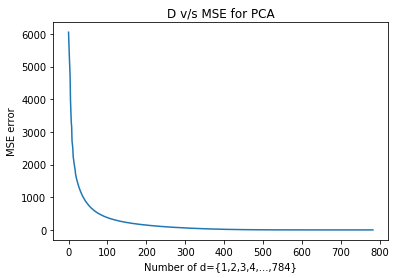

In [9]:
my_train_data = train_data.reshape(training_samples, image_size * image_size)
d = np.arange(784)

mses=[]

# For loop for converting data to lower d dimension data, then reconstruct the data and then calculate MSE
for val in d:
    lower_dimentions_data, eigen_vector, eigen_values, mean =pca_from_no_dimentions(np.array(my_train_data.T), val)  
    reconstructed_data = np.array(np.dot(eigen_vector, lower_dimentions_data)) + mean
    mse = (np.square(my_train_data.T - reconstructed_data)).mean()
    mses.append(mse)
    print("Finished:", val+1,"/ 784",end='\r')

# Plotting the D vs MSE
plt.title('D v/s MSE for PCA')
plt.xlabel('Number of d={1,2,3,4,...,784}')
plt.ylabel('MSE error')
plt.plot(d,mses)
plt.show()

d) Reconstruct a sample from the class of number ‘5’ and show it as a ‘png’ image for d= {1, 10, 50, 250, 784}. Discuss the results.

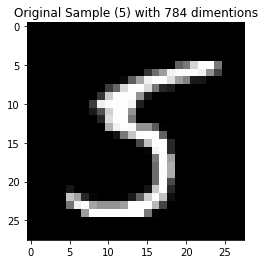

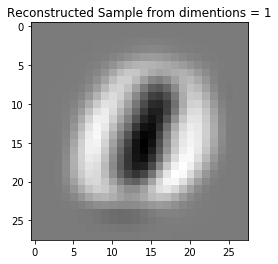

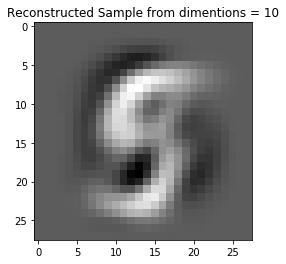

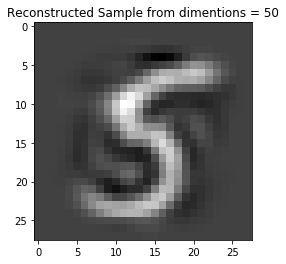

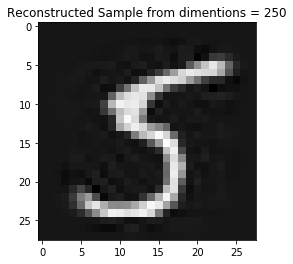

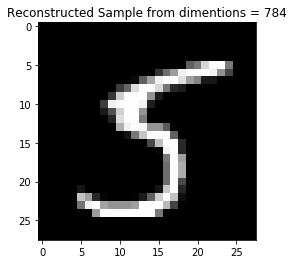

In [6]:
i=len(train_labels)-1
while i > 0:
    if train_labels[i] == 5: break
    i-=1
    
plt.title('Original Sample (5) with 784 dimentions')
plt.imshow(train_data[i], cmap='gray')
plt.show()
    
data = train_data.reshape(training_samples, image_size * image_size)
d=[1,10,50,250,784]

# For loop for converting data to lower d dimension data, then reconstruct the data and then plot the image
for val in d:
    lower_dimentions_data, eigen_vector, eigen_values, mean=pca_from_no_dimentions(np.array(data.T), val)
    reconstructed_data = np.array(np.dot(eigen_vector,lower_dimentions_data)) + mean
    reconstructed_data_reshaped = reconstructed_data.T.reshape(training_samples, image_size, image_size)
    plt.title('Reconstructed Sample from dimentions = %i'%val)
    plt.imshow(reconstructed_data_reshaped[i].real, cmap='gray')
    plt.show()

e) For the values of d= {1, 2, 3, 4, ..., 784} plot eigenvalues (y-axis) versus d (x-axis). Discuss the results.

/Users/tushar/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


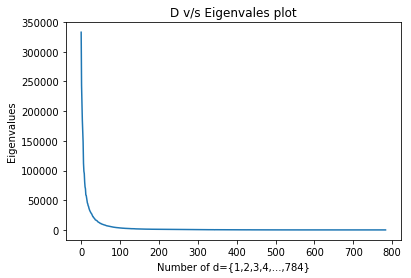

In [7]:
d = np.arange(784)

my_train_data = train_data.reshape(training_samples, image_size * image_size)
cov = np.cov(my_train_data.T)
eigen_values, _ = np.linalg.eig(np.mat(cov))


# Plotting Eigen Values vs D dimensions
plt.title('D v/s Eigenvales plot')
plt.xlabel('Number of d={1,2,3,4,...,784}')
plt.ylabel('Eigenvalues')
plt.plot(d,eigen_values)
plt.show()